In [2]:
with open("/content/drive/MyDrive/IrisSpecies/iris.data", "r") as f:
    data = f.readlines()

data = [line.strip() for line in data if line.strip()]
print(data[:5])


['5.1,3.5,1.4,0.2,Iris-setosa', '4.9,3.0,1.4,0.2,Iris-setosa', '4.7,3.2,1.3,0.2,Iris-setosa', '4.6,3.1,1.5,0.2,Iris-setosa', '5.0,3.6,1.4,0.2,Iris-setosa']


In [3]:
with open("/content/drive/MyDrive/IrisSpecies/iris.names", "r") as f:
    data = f.readlines()

data = [line.strip() for line in data if line.strip()]
print(data[:5])

['1. Title: Iris Plants Database', 'Updated Sept 21 by C.Blake - Added discrepency information', '2. Sources:', '(a) Creator: R.A. Fisher', '(b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)']


In [4]:
with open("/content/drive/MyDrive/IrisSpecies/bezdekIris.data", "r") as f:
    data = f.readlines()

data = [line.strip() for line in data if line.strip()]
print(data[:5])

['5.1,3.5,1.4,0.2,Iris-setosa', '4.9,3.0,1.4,0.2,Iris-setosa', '4.7,3.2,1.3,0.2,Iris-setosa', '4.6,3.1,1.5,0.2,Iris-setosa', '5.0,3.6,1.4,0.2,Iris-setosa']


✅ Accuracy: 1.0

📊 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



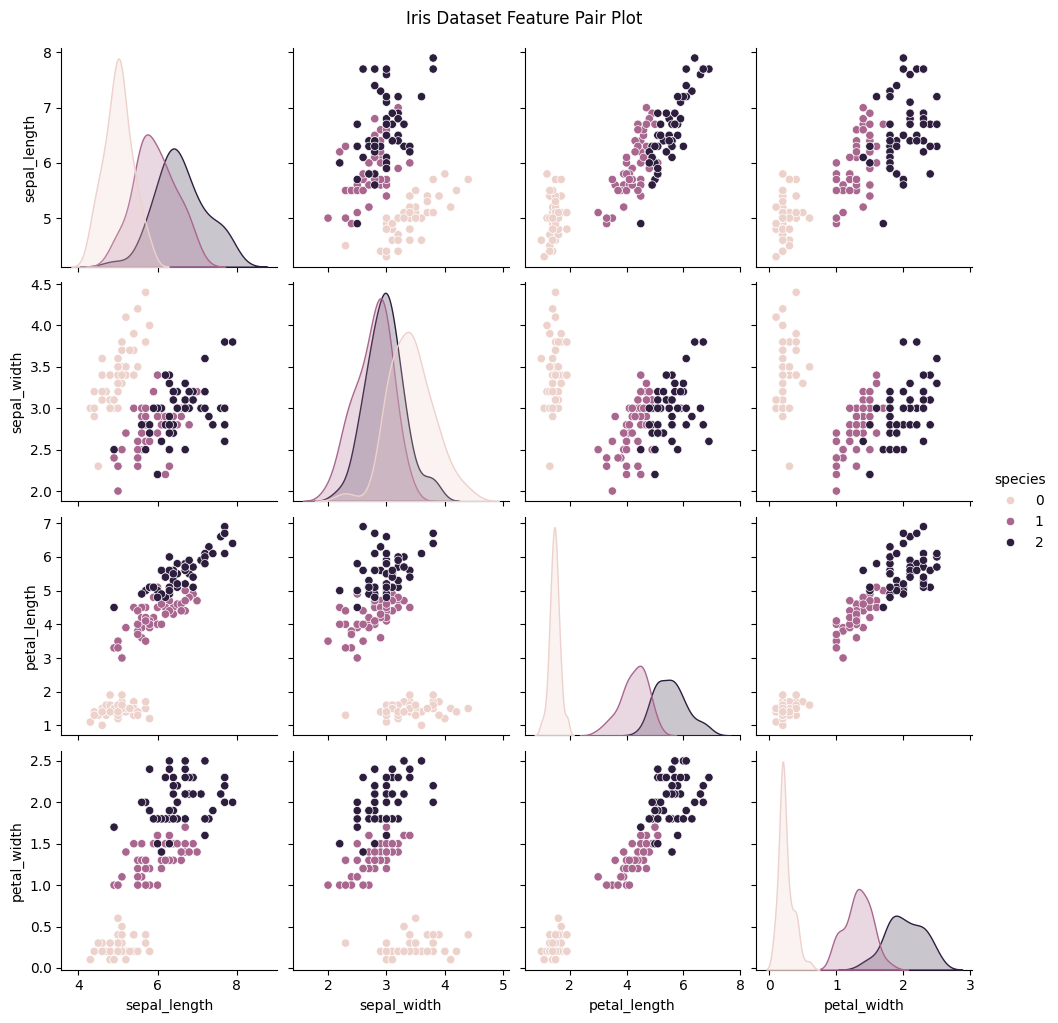

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Read and Process the iris.data File
with open("/content/drive/MyDrive/IrisSpecies/iris.data", "r") as f:
    lines = [line.strip() for line in f if line.strip()]

data = [line.split(",") for line in lines]

#Create DataFrame
df = pd.DataFrame(data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# Convert numeric columns
for col in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    df[col] = df[col].astype(float)

# Encode Species Labels (e.g. Setosa → 0, Versicolor → 1, Virginica → 2)
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Split into Features (X) and Labels (y)
X = df.drop('species', axis=1)
y = df['species']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Feature Relationships
sns.pairplot(df, hue='species')
plt.suptitle("Iris Dataset Feature Pair Plot", y=1.02)
plt.show()
